In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

# Carga de datos 

In [2]:
df = pd.read_csv("../data/ML/df_final.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Population,Number of Referrals,Tenure in Months,Offer,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,0,Los Angeles,68701,0,1,None,...,20,0.00,59.65,3,Churned,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,Yes,1,Los Angeles,55668,1,8,Offer E,...,0,390.80,1024.10,3,Churned,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,3,Los Angeles,47534,0,18,Offer D,...,0,203.94,1910.88,2,Churned,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,Yes,1,Inglewood,27778,1,25,Offer C,...,0,494.00,2995.07,2,Churned,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,Yes,1,Whittier,26265,1,37,Offer C,...,0,234.21,3102.36,2,Churned,1,67,2793,Price,Extra data charges


# EDA

In [3]:
# Cuantas filas y columnas tenemos
df.shape

(7043, 40)

In [4]:
# Cuántos valores nulos tenemos en el dataset
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Population                              0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

In [5]:
df["Churn Category"].unique()

array(['Competitor', 'Dissatisfaction', 'Price', 'Other', 'Attitude', nan],
      dtype=object)

In [6]:
df["Churn Reason"].unique()

array(['Competitor offered more data', 'Competitor made better offer',
       'Limited range of services', 'Extra data charges',
       'Competitor had better devices', "Don't know",
       'Service dissatisfaction',
       'Lack of affordable download/upload speed',
       'Product dissatisfaction', 'Long distance charges',
       'Poor expertise of online support', 'Attitude of support person',
       'Network reliability', 'Competitor offered higher download speeds',
       'Moved', 'Price too high', 'Attitude of service provider',
       'Poor expertise of phone support', 'Deceased', nan,
       'Lack of self-service on Website'], dtype=object)

- Quitaremos de nuestro dataset los clientes que han fallecido y los que se han mudado ya que no aporta información relevante ya que su estancia en la empresa no depende de o que le ofrezacamos sino a situaciones personales externas

In [7]:
len(df.loc[(df['Churn Reason']=="Moved") | (df['Churn Reason']=="Deceased") ]
)

52

In [8]:
df= df.loc[(df['Churn Reason']!="Moved")  & (df['Churn Reason']!="Deceased") ]

In [9]:
df.shape

(6991, 40)

In [10]:
df.drop(columns=["Customer ID","Churn Category","Churn Reason","Population","City"], axis=1, inplace=True)

In [11]:
# Exploramos los tipos de los datos que tenemos
df.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6991.0,46.488771,16.751029,19.00,32.00,46.00,60.000,80.00
Number of Dependents,6991.0,0.470748,0.964593,0.00,0.00,0.00,0.000,9.00
Number of Referrals,6991.0,1.961522,3.008016,0.00,0.00,0.00,3.000,11.00
Tenure in Months,6991.0,32.494779,24.550289,1.00,9.00,29.00,56.000,72.00
Avg Monthly Long Distance Charges,6991.0,22.954998,15.451233,0.00,9.21,22.88,36.395,49.99
Avg Monthly GB Download,6991.0,20.532542,20.435951,0.00,3.00,17.00,27.000,85.00
Monthly Charge,6991.0,64.675704,30.124200,18.25,35.40,70.30,89.850,118.75
Total Charges,6991.0,2286.403682,2268.905318,18.80,402.55,1397.30,3805.875,8684.80
Total Refunds,6991.0,1.976777,7.930135,0.00,0.00,0.00,0.000,49.79
Total Extra Data Charges,6991.0,6.870262,25.141435,0.00,0.00,0.00,0.000,150.00


# Variable respuesta

- 1 (Si): el cliente se quedó en la empresa
- 0 (No) : el cliente se marchó de la empresa

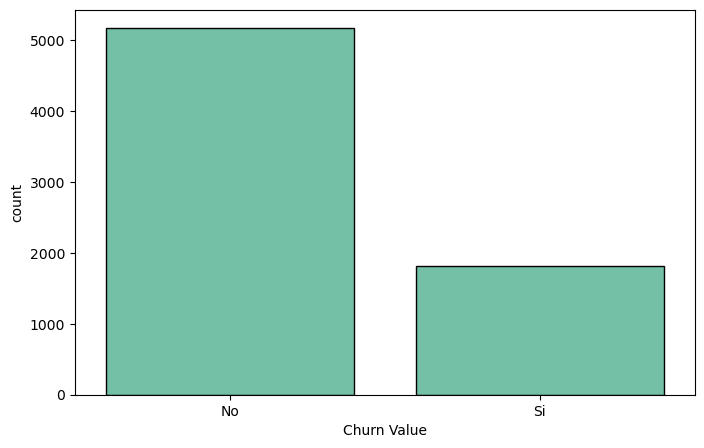

In [13]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "Churn Value",  color = "mediumaquamarine",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Si"]) 
plt.show();

In [14]:
df["Churn Value"].value_counts() / df.shape[0]


0    0.740094
1    0.259906
Name: Churn Value, dtype: float64

# Variables predictoras

## Variables catégoricas


In [15]:
df_categoricas=df.select_dtypes(include = "object")

In [47]:
df_categoricas.head(2)

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Customer Status
0,Male,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,Churned
1,Female,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Churned


- "Churned" significa que el cliente ha abandonado el servicio.
- "Stayed" significa que el cliente ha permanecido en el servicio.
- "Joined" significa que el cliente ha adquirido el servicio recientemente.

In [17]:
df_categoricas.columns

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status'],
      dtype='object')

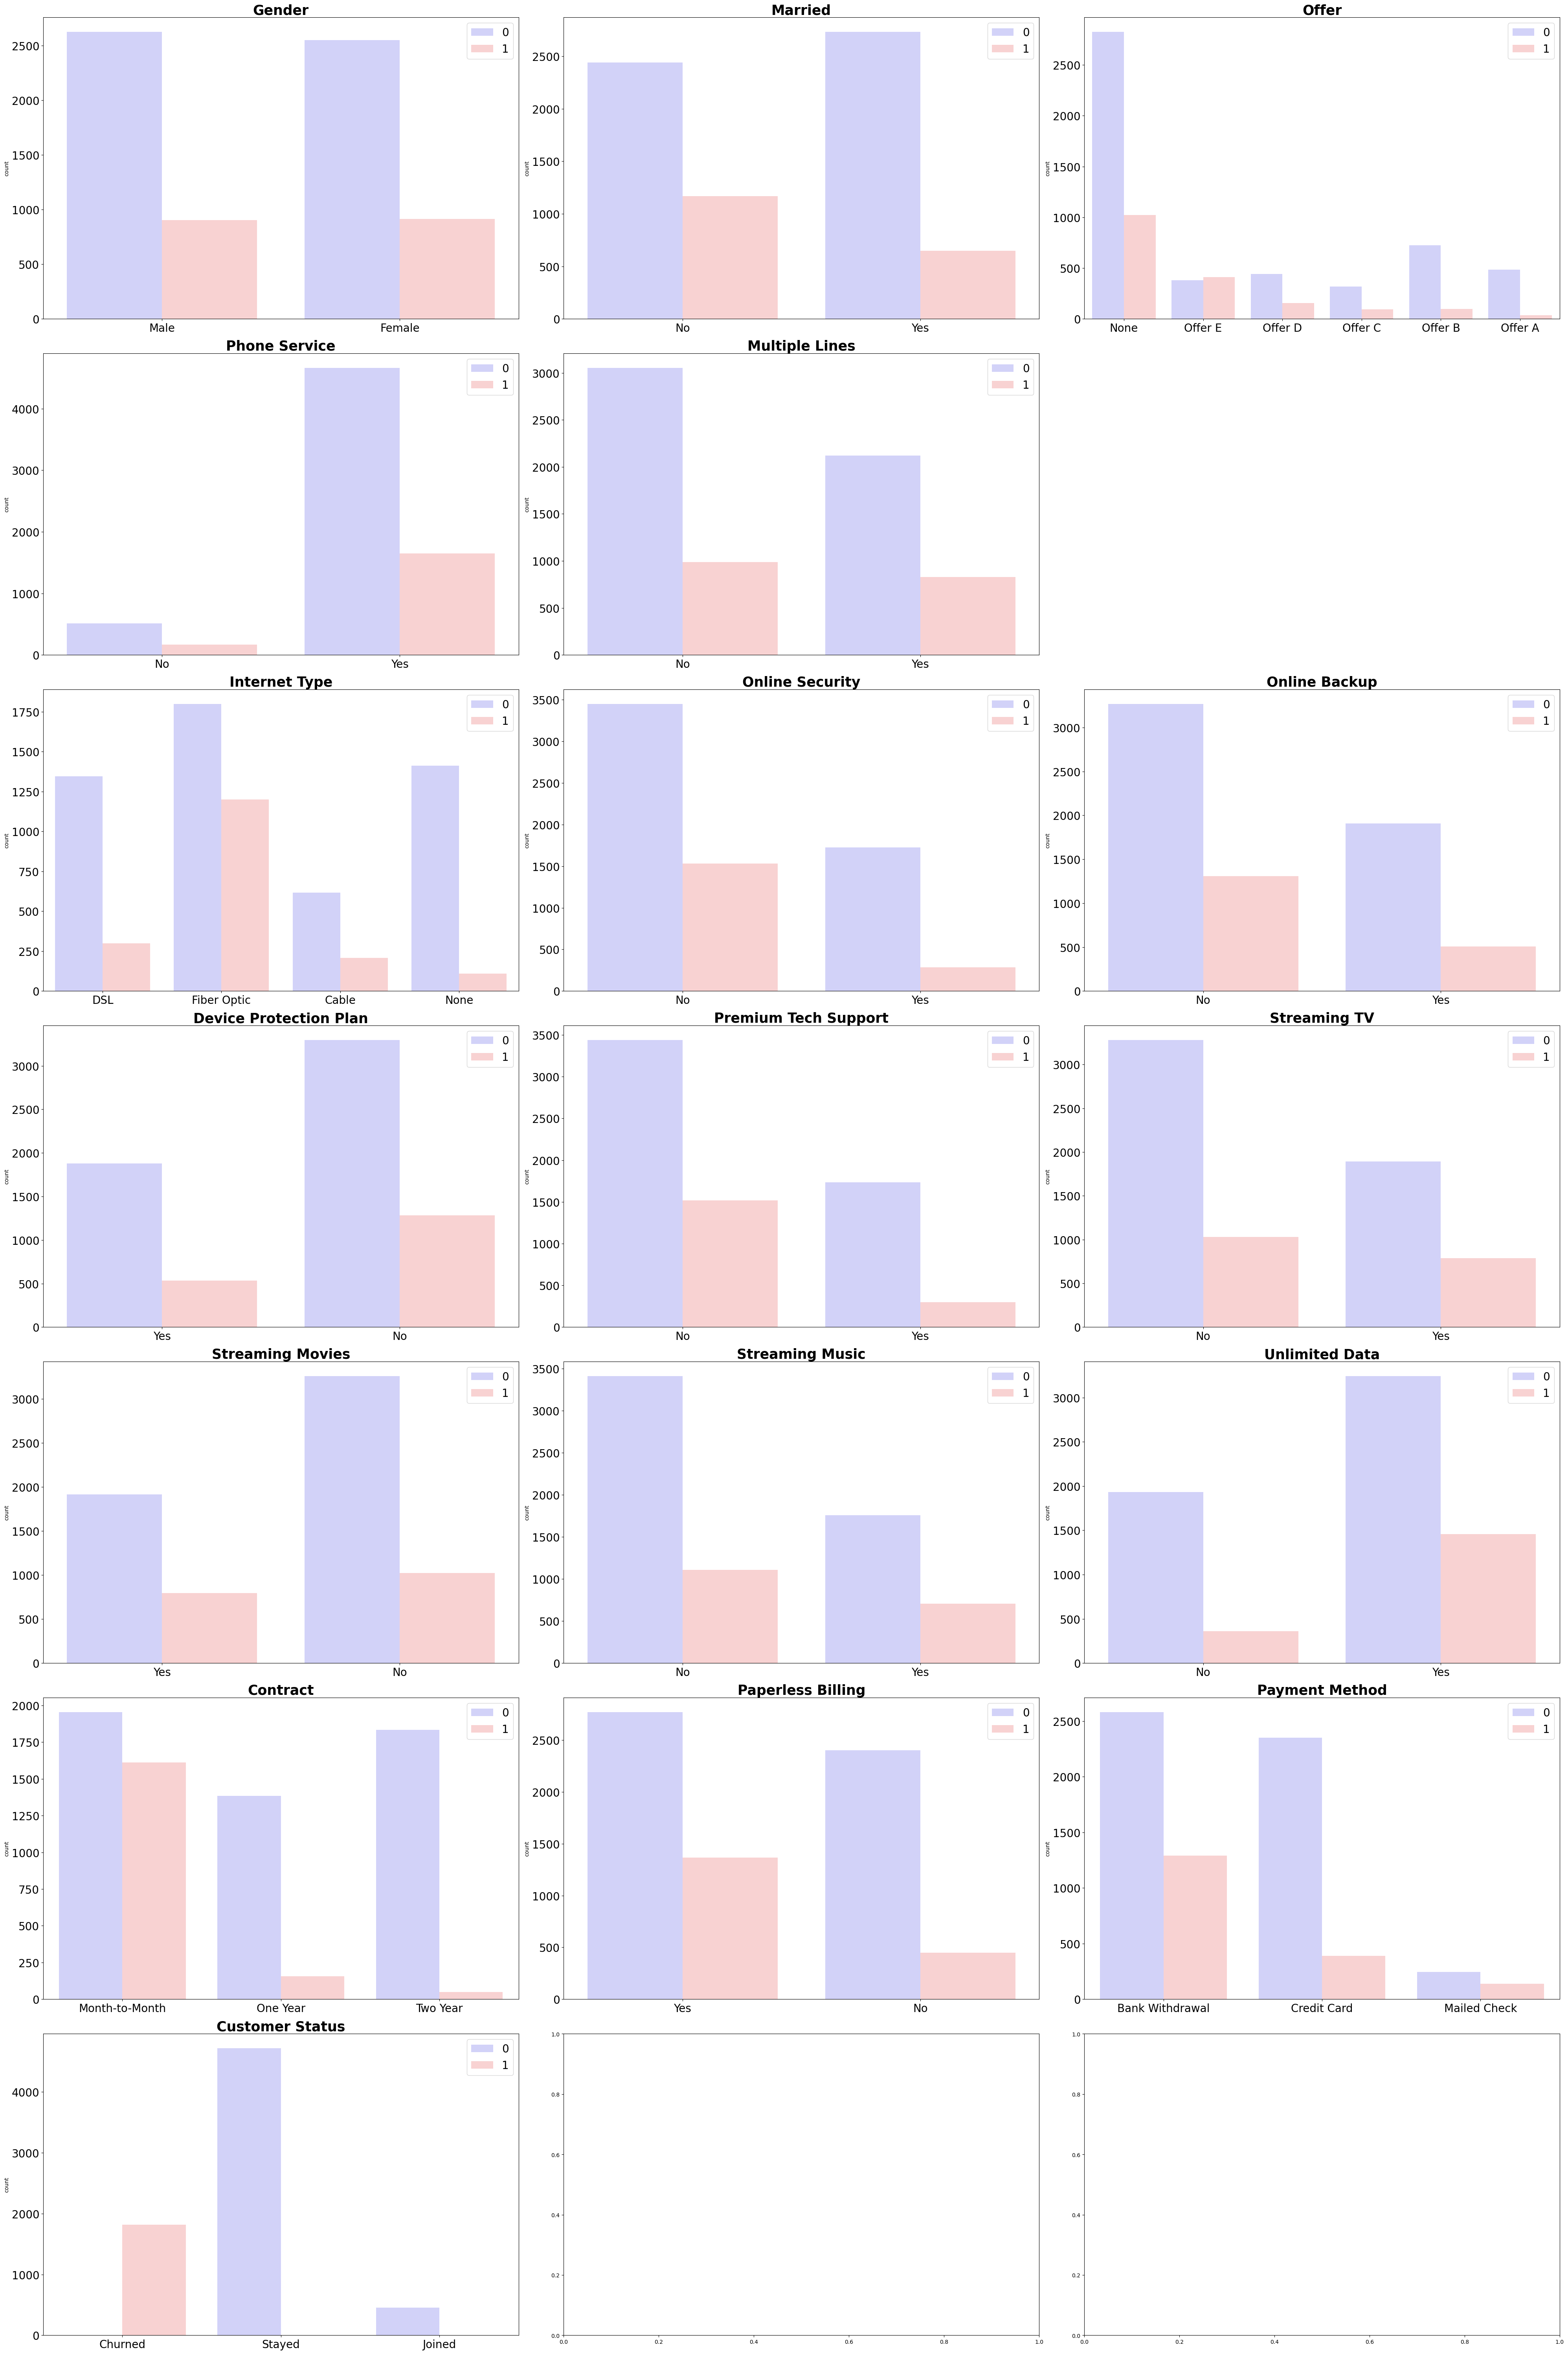

In [18]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (40, 60))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Churn Value",
        alpha = 0.2,
        palette = ["blue", "red"], # cambia los colores a azul y negro
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(fontsize=20) # aumenta el tamaño de la leyenda

fig.delaxes(axes[5])
fig.tight_layout()


In [19]:
df_categoricas["Customer Status"].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

- "Churned" significa que el cliente ha abandonado el servicio.
- "Stayed" significa que el cliente ha permanecido en el servicio.
- "Joined" significa que el cliente ha adquirido el servicio recientemente.

In [20]:
#eliminamos la columna Customer Status pues no nos da ninguna información relevante comparandolo con la variable repsuesta
df.drop(columns=["Customer Status"], axis=1, inplace=True)

In [21]:
df.head(1)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
0,Male,78,No,0,0,1,None,No,0.0,No,...,39.65,39.65,0.0,20,0.0,59.65,3,1,91,5433


## Variables numéricas

In [22]:
df.select_dtypes(include = np.number).describe().T


,count,mean,std,min,25%,50%,75%,max
Age,6991.0,46.488771,16.751029,19.00,32.00,46.00,60.000,80.00
Number of Dependents,6991.0,0.470748,0.964593,0.00,0.00,0.00,0.000,9.00
Number of Referrals,6991.0,1.961522,3.008016,0.00,0.00,0.00,3.000,11.00
Tenure in Months,6991.0,32.494779,24.550289,1.00,9.00,29.00,56.000,72.00
Avg Monthly Long Distance Charges,6991.0,22.954998,15.451233,0.00,9.21,22.88,36.395,49.99
Avg Monthly GB Download,6991.0,20.532542,20.435951,0.00,3.00,17.00,27.000,85.00
Monthly Charge,6991.0,64.675704,30.124200,18.25,35.40,70.30,89.850,118.75
Total Charges,6991.0,2286.403682,2268.905318,18.80,402.55,1397.30,3805.875,8684.80
Total Refunds,6991.0,1.976777,7.930135,0.00,0.00,0.00,0.000,49.79
Total Extra Data Charges,6991.0,6.870262,25.141435,0.00,0.00,0.00,0.000,150.00


In [23]:
len(df.select_dtypes(include = np.number).describe().T
)

16

In [24]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (100, 70))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("Churn Value")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        color = "blue",
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 35, fontweight = "bold")
    axes[i].tick_params(labelsize = 50)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();


In [25]:
df_numericas = df.select_dtypes(include = np.number).drop("Churn Value", axis = 1)
df_numericas.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,3,91,5433
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,3,69,5302
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,2,81,3179
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,2,88,5337
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,2,67,2793


In [26]:
correlation = df_numericas.corr()
correlation

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
Age,1.000000,-0.118143,-0.025325,0.009692,-0.012009,-0.376041,0.145414,0.059673,0.024575,0.023770,0.003246,0.048305,-0.084693,0.083593,-0.002681
Number of Dependents,-0.118143,1.000000,0.277771,0.107688,-0.005968,0.129258,-0.131586,0.021980,0.013521,-0.014276,0.068938,0.037609,0.151869,-0.159784,0.049088
Number of Referrals,-0.025325,0.277771,1.000000,0.325937,0.007246,0.038875,0.029507,0.249692,0.023997,-0.000439,0.215555,0.261189,0.187357,-0.200022,0.121950
Tenure in Months,0.009692,0.107688,0.325937,1.000000,0.015077,0.049111,0.249836,0.825436,0.058137,0.080712,0.673206,0.852579,0.207948,-0.222187,0.396328
Avg Monthly Long Distance Charges,-0.012009,-0.005968,0.007246,0.015077,1.000000,-0.028391,0.139378,0.070093,-0.018650,0.002995,0.601604,0.233411,0.001886,0.022027,0.024158
Avg Monthly GB Download,-0.376041,0.129258,0.038875,0.049111,-0.028391,1.000000,0.393903,0.224062,0.002195,0.090186,0.011081,0.181309,-0.093876,0.023442,0.024442
Monthly Charge,0.145414,-0.131586,0.029507,0.249836,0.139378,0.393903,1.000000,0.653872,0.034288,0.127572,0.247837,0.591562,-0.224120,0.130385,0.099804
Total Charges,0.059673,0.021980,0.249692,0.825436,0.070093,0.224062,0.653872,1.000000,0.039006,0.121254,0.609071,0.972116,0.066493,-0.122045,0.342025
Total Refunds,0.024575,0.013521,0.023997,0.058137,-0.018650,0.002195,0.034288,0.039006,1.000000,0.016702,0.027431,0.036349,0.022655,-0.011881,0.007174
Total Extra Data Charges,0.023770,-0.014276,-0.000439,0.080712,0.002995,0.090186,0.127572,0.121254,0.016702,1.000000,0.058219,0.121854,-0.010824,0.008992,0.041104


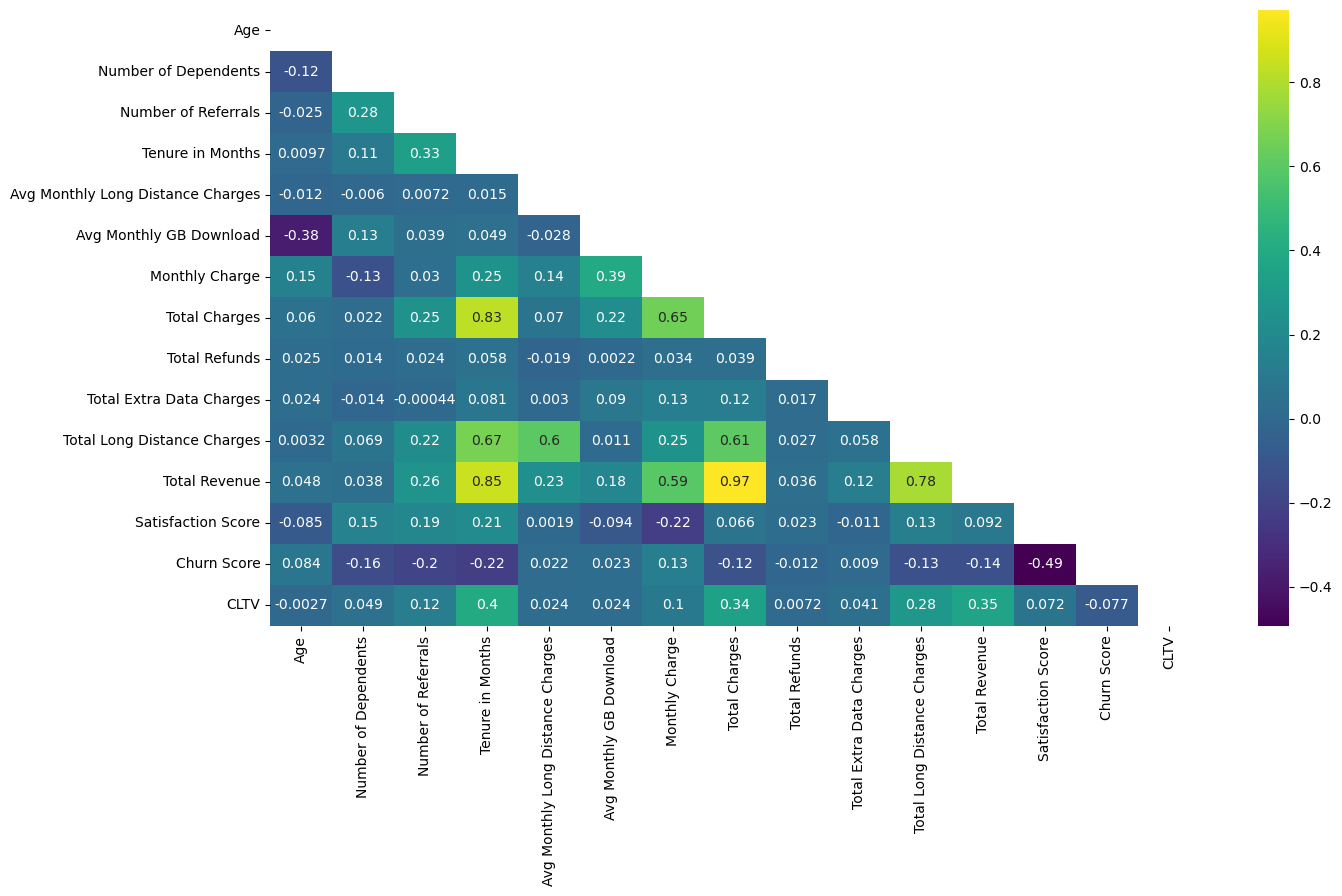

In [27]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

- Total Revenue es el conjunto de todas estas columnas: 
    - Avg Monthly Long Distance Charges
    - Monthly Charge
    - Total Charges
    - Total Refunds
    - Total Extra Data Charges
    - Total Long Distance Charges

In [28]:
df.drop(columns=["Avg Monthly Long Distance Charges","Monthly Charge","Total Charges","Total Refunds","Total Extra Data Charges","Total Long Distance Charges"], axis=1, inplace=True)

In [29]:
df_numericas2 = df.select_dtypes(include = np.number)
df_numericas2.head(10)

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
0,78,0,0,1,8,59.65,3,1,91,5433
1,74,1,1,8,17,1024.10,3,1,69,5302
2,71,3,0,18,52,1910.88,2,1,81,3179
3,78,1,1,25,12,2995.07,2,1,88,5337
4,80,1,1,37,14,3102.36,2,1,67,2793
5,72,1,0,27,18,2235.41,1,1,95,4638
6,76,2,1,1,30,85.73,2,1,76,3964
7,66,0,6,58,24,2610.25,1,1,91,5444
8,70,2,0,15,19,1806.75,2,1,91,5717
9,77,2,0,7,18,681.20,2,1,81,4419


In [30]:
correlation2 = df_numericas2.corr()
correlation2

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
Age,1.000000,-0.118143,-0.025325,0.009692,-0.376041,0.048305,-0.084693,0.115289,0.083593,-0.002681
Number of Dependents,-0.118143,1.000000,0.277771,0.107688,0.129258,0.037609,0.151869,-0.217880,-0.159784,0.049088
Number of Referrals,-0.025325,0.277771,1.000000,0.325937,0.038875,0.261189,0.187357,-0.284537,-0.200022,0.121950
Tenure in Months,0.009692,0.107688,0.325937,1.000000,0.049111,0.852579,0.207948,-0.350330,-0.222187,0.396328
Avg Monthly GB Download,-0.376041,0.129258,0.038875,0.049111,1.000000,0.181309,-0.093876,0.050936,0.023442,0.024442
Total Revenue,0.048305,0.037609,0.261189,0.852579,0.181309,1.000000,0.092319,-0.220906,-0.135894,0.354465
Satisfaction Score,-0.084693,0.151869,0.187357,0.207948,-0.093876,0.092319,1.000000,-0.754724,-0.493057,0.071893
Churn Value,0.115289,-0.217880,-0.284537,-0.350330,0.050936,-0.220906,-0.754724,1.000000,0.658766,-0.123596
Churn Score,0.083593,-0.159784,-0.200022,-0.222187,0.023442,-0.135894,-0.493057,0.658766,1.000000,-0.077038
CLTV,-0.002681,0.049088,0.121950,0.396328,0.024442,0.354465,0.071893,-0.123596,-0.077038,1.000000


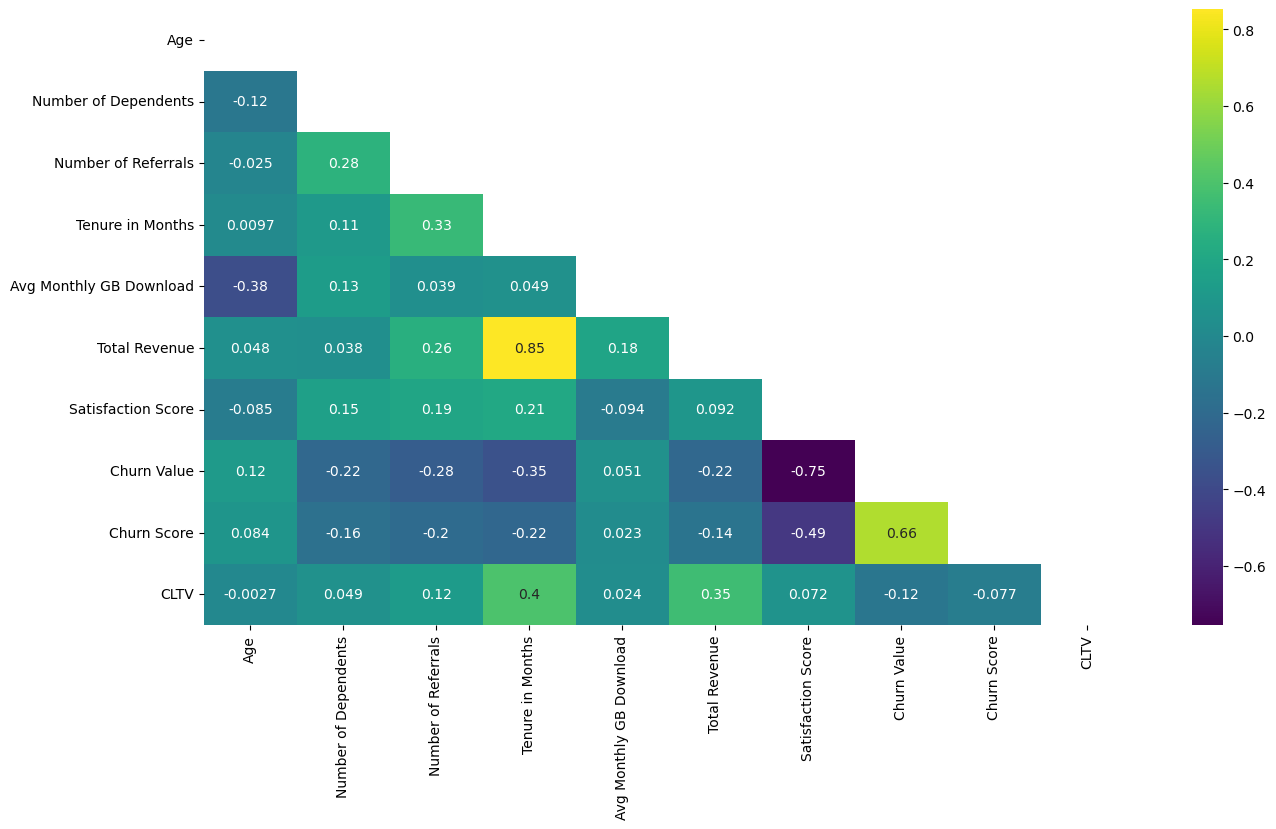

In [31]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation2, dtype=bool))
sns.heatmap(correlation2, cmap="viridis", annot = True, mask = mask); #barra lateral

 - "Churn Score" está directamente relaionado con la variable respuesta 
 - "Ternure in months" está directamente relacionado con "Ternure Revenue" ya que entre más tiempo haya estado el cliente en la empresa más dinero en ganancias da a la empresa , puest que tienen más servicios contratados 

In [33]:
df.drop(columns=["Churn Score","Tenure in Months"], axis=1, inplace=True)

In [34]:
df_numericas3 = df.select_dtypes(include = np.number)
correlation3 = df_numericas3.corr()

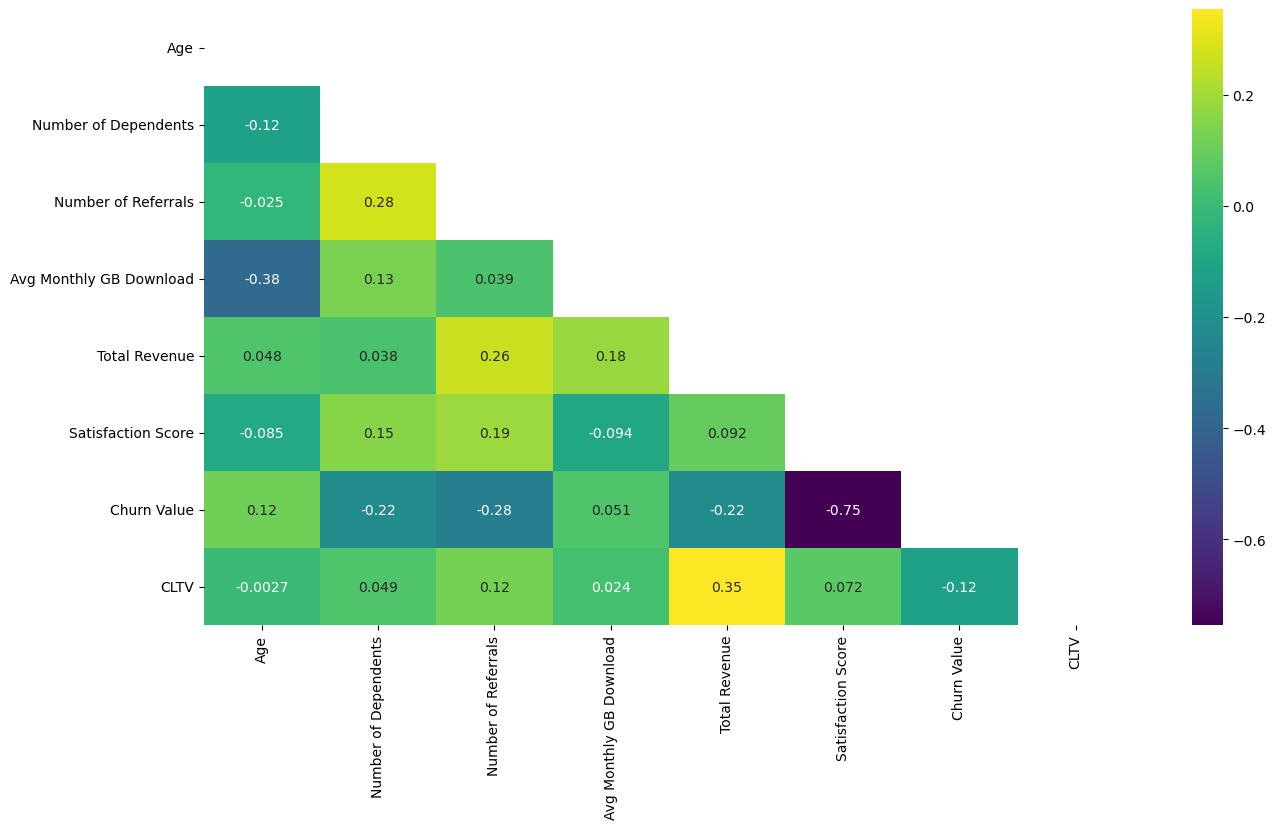

In [35]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation3, dtype=bool))
sns.heatmap(correlation3, cmap="viridis", annot = True, mask = mask); #barra lateral

# Preprocesamiento


## Outliers


In [36]:
df_numericas3.head(1)

,Age,Number of Dependents,Number of Referrals,Avg Monthly GB Download,Total Revenue,Satisfaction Score,Churn Value,CLTV
0,78,0,0,8,59.65,3,1,5433


In [37]:
df_numericas_1= df_numericas3.copy()

In [38]:
df_numericas_1.drop(columns=["Churn Value","Number of Dependents","Number of Referrals"], axis=1, inplace=True)

In [40]:
df_numericas_1.head(1)

,Age,Avg Monthly GB Download,Total Revenue,Satisfaction Score,CLTV
0,78,8,59.65,3,5433


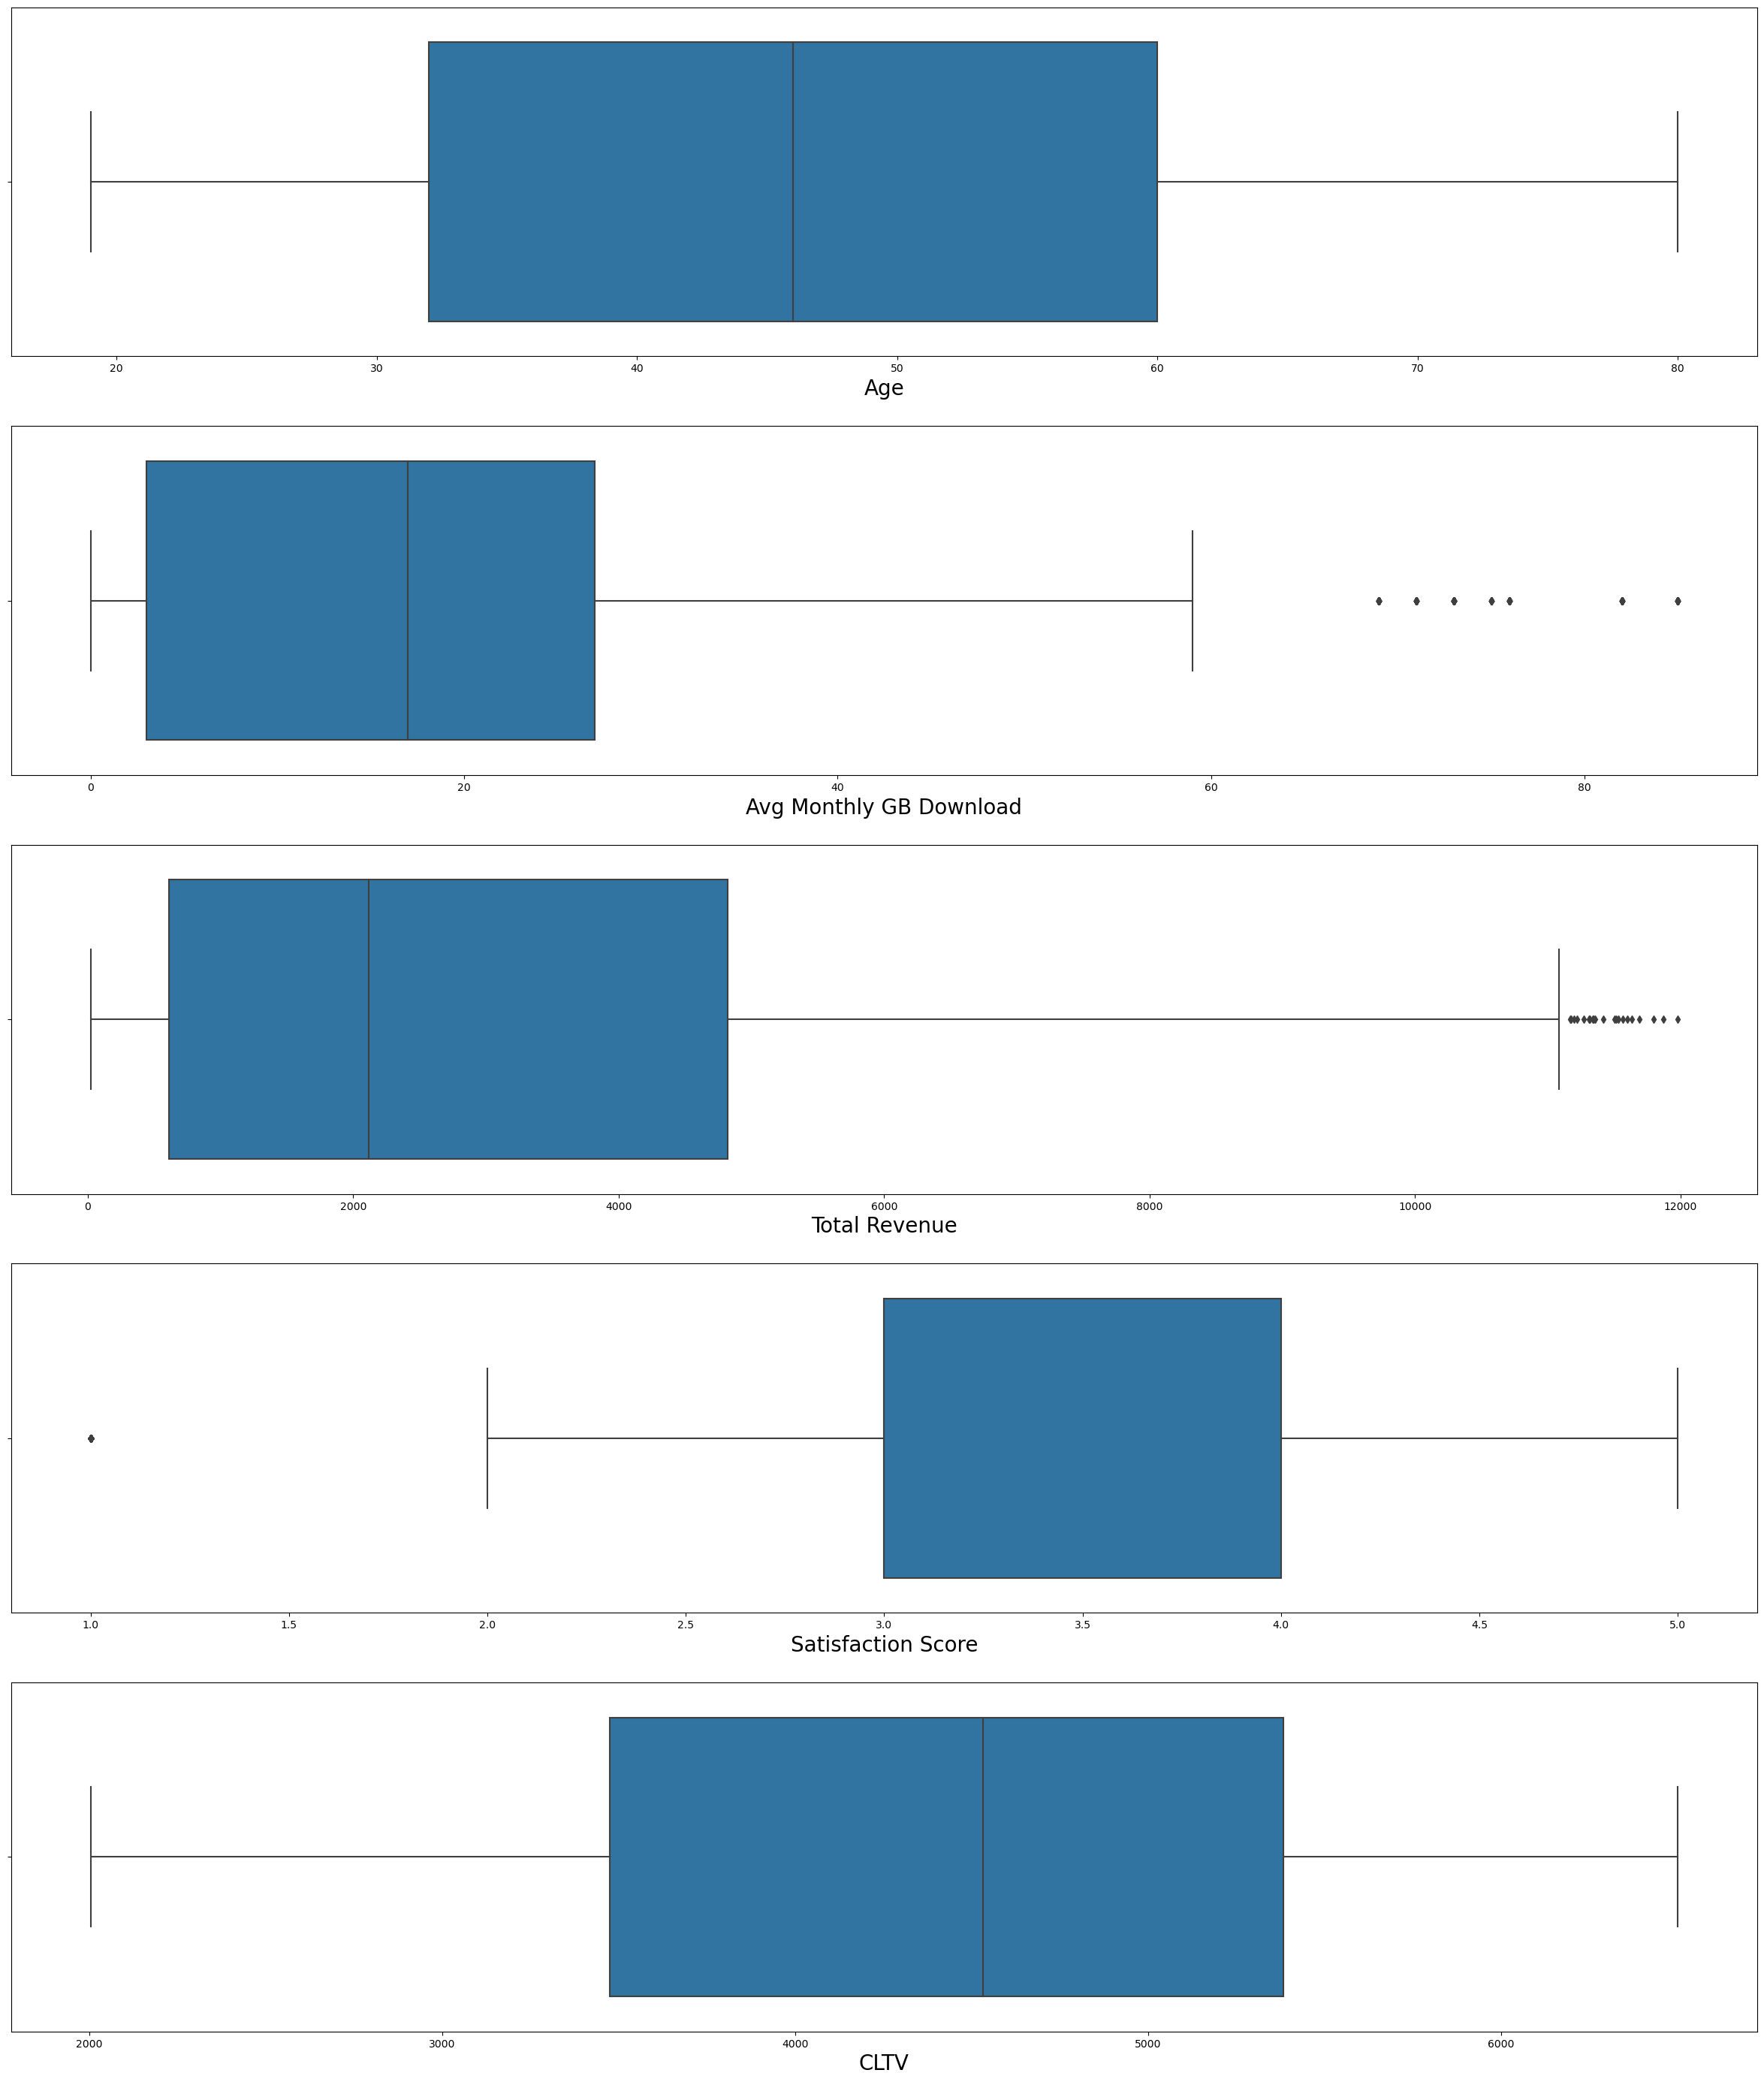

In [43]:
fig, ax = plt.subplots(5, 1, figsize=(30,35))

for i in range(len(df_numericas_1.columns)):
    sns.boxplot(x=df_numericas_1.columns[i], data=df_numericas_1, ax=ax[i])
    ax[i].set_xlabel(df_numericas_1.columns[i], fontsize=20)
    
plt.show()


In [ ]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [44]:
df_numericas_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6991.0,46.488771,16.751029,19.00,32.00,46.00,60.00,80.00
Avg Monthly GB Download,6991.0,20.532542,20.435951,0.00,3.00,17.00,27.00,85.00
Total Revenue,6991.0,3042.933186,2868.153716,21.36,609.81,2114.55,4821.09,11979.34
Satisfaction Score,6991.0,3.253040,1.200463,1.00,3.00,3.00,4.00,5.00
CLTV,6991.0,4404.359176,1181.924892,2003.00,3475.00,4531.00,5383.00,6500.00


# Estandarización 

# Codificación

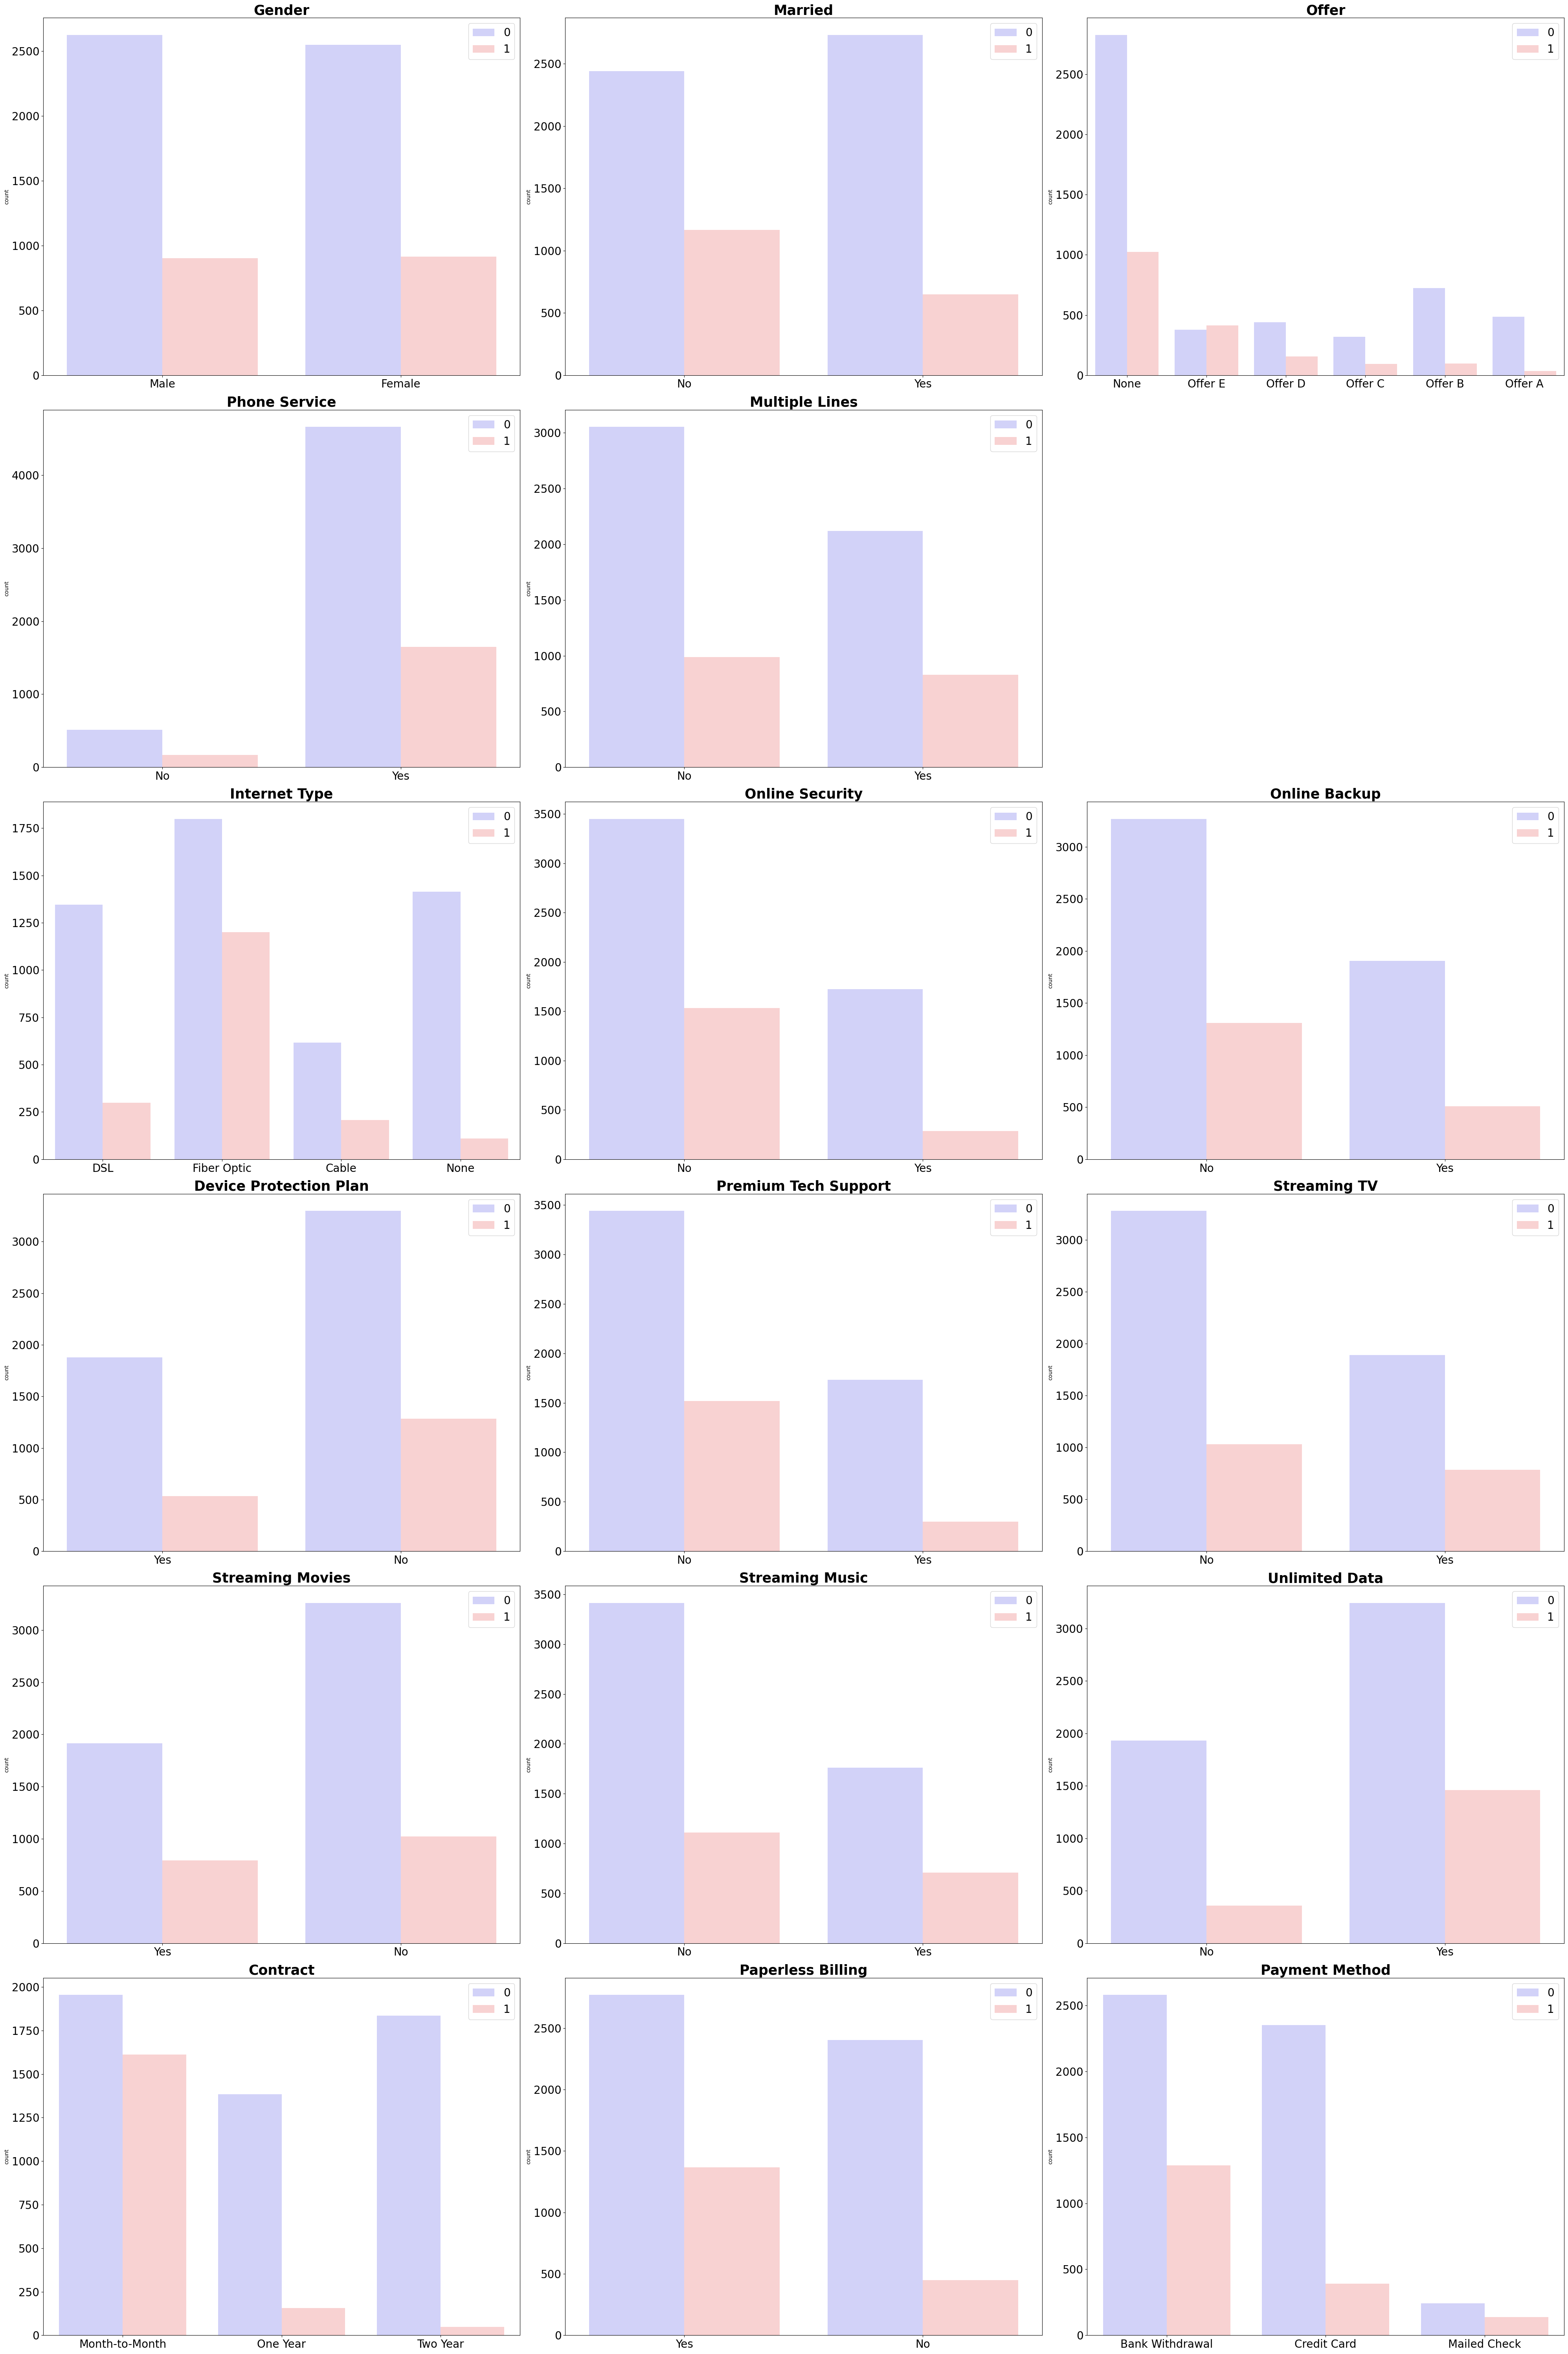

In [48]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (40, 60))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "Churn Value",
        alpha = 0.2,
        palette = ["blue", "red"], # cambia los colores a azul y negro
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(fontsize=20) # aumenta el tamaño de la leyenda

fig.delaxes(axes[5])
fig.tight_layout()


## Variables sin orden

## Variables con orden

In [ ]:
# Chequeamos valores únicos

print(' Married, tiene', df['Married'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('FastingBS has', df['FastingBS'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('ChestPainType has', df['ChestPainType'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('RestingECG has', df['RestingECG'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('ExerciseAngina has', df['ExerciseAngina'].unique(), 'categorias')
print("---------------------------------------------------------------------------")
print('ST_Slope has', df['ST_Slope'].unique(), 'categorias')